In [1]:
import optuna
import os
import imageio_ffmpeg as ffmpeg
import pandas as pd
from matplotlib.animation import FuncAnimation, writers


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


In [3]:
# Specify the directory where your database file is stored
models_dir = '../models/dev'
model_dir = os.path.join(models_dir, 'xgb')

# Specify the SQLite database URL
storage = f'sqlite:///{os.path.join(model_dir, "optuna_study.db")}'

# Specify the study name
study_name = "xgb_optimization_study"

# Load the study
study = optuna.load_study(study_name=study_name, storage=storage)

# Now the study is loaded and you can use it, for example, to get the best parameters
best_params = study.best_params
print(best_params)


{'n_estimators': 662, 'max_depth': 15, 'learning_rate': 0.03793986414727196, 'min_child_weight': 6, 'subsample': 0.6851872068200734, 'colsample_bytree': 0.5428988782954}


In [4]:
# List all trials in the study
all_trials = study.trials
for trial in all_trials:
    print(f"Trial #{trial.number}: {trial.params}, Value: {trial.value}")

# Access a specific trial by trial number
trial_number = 10  # Replace with the desired trial number
specific_trial = study.trials[trial_number - 1]
#print(f"Trial #{specific_trial.number}: {specific_trial.params}, Value: {specific_trial.value}")


Trial #0: {'n_estimators': 943, 'max_depth': 1, 'learning_rate': 0.15053669732374644, 'min_child_weight': 1, 'subsample': 0.5261103061095684, 'colsample_bytree': 0.5856265350275747}, Value: 0.6714462947424178
Trial #1: {'n_estimators': 962, 'max_depth': 13, 'learning_rate': 0.16011069942838904, 'min_child_weight': 4, 'subsample': 0.780749569097481, 'colsample_bytree': 0.6245912875301148}, Value: 0.7035430446419857
Trial #2: {'n_estimators': 975, 'max_depth': 20, 'learning_rate': 0.17059837747888135, 'min_child_weight': 1, 'subsample': 0.568504776746979, 'colsample_bytree': 0.9716977251888916}, Value: 0.7057691101967848
Trial #3: {'n_estimators': 844, 'max_depth': 19, 'learning_rate': 0.1096570864563644, 'min_child_weight': 9, 'subsample': 0.6520448480096908, 'colsample_bytree': 0.9625061483298505}, Value: 0.7016371283919496
Trial #4: {'n_estimators': 843, 'max_depth': 3, 'learning_rate': 0.2243859543037952, 'min_child_weight': 7, 'subsample': 0.8917482655364385, 'colsample_bytree': 0.8

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML


In [6]:
# Get the trials data
num_trials = 50
trials = study.trials_dataframe()[0:num_trials]


In [7]:
interp_steps = 24  # Number of interpolation steps between each pair of trials

# Columns to interpolate
interpolate_columns = [
    'params_colsample_bytree', 'params_learning_rate', 'params_max_depth', 
    'params_min_child_weight', 'params_n_estimators', 'params_subsample',
    'value'
]

# Columns to retain without interpolation
retain_columns = [
    'number', 'datetime_start', 'datetime_complete', 'duration', 'state'
]

# Create a list to store the DataFrames with the interpolated values for each pair of trials
dfs = []

for i in range(len(trials) - 1):
    # Get the hyperparameter values for the current and next trial
    current_values = trials.iloc[i][interpolate_columns].values
    next_values = trials.iloc[i + 1][interpolate_columns].values
    
    # Create a dictionary with interpolated values for each hyperparameter
    data = {col: np.linspace(current_values[j], next_values[j], interp_steps) for j, col in enumerate(interpolate_columns)}
    
    # Add the retained values to the dictionary
    for col in retain_columns:
        data[col] = [trials.iloc[i][col]] * interp_steps
    
    # Create a DataFrame with the interpolated and retained values and add it to the list
    df = pd.DataFrame(data)
    dfs.append(df)

# Concatenate the DataFrames to create a single DataFrame with all interpolated values
# Add the last trial to the end of the interpolated DataFrame
last_trial = trials.iloc[-1].copy()
for col in interpolate_columns:
    last_trial[col] = [trials.iloc[-1][col]]
for col in retain_columns:
    last_trial[col] = [trials.iloc[-1][col]]

# Add the last trial to the end of the interpolated DataFrame
last_trial = trials.iloc[-1:].copy()  # This will return a DataFrame with a single row

# Append the last trial data as a new row in the DataFrame
dfs.append(last_trial)
interpolated_trials = pd.concat(dfs, ignore_index=True)


In [8]:
interpolated_trials.tail()

,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_subsample,value,number,datetime_start,datetime_complete,duration,state
1172,0.647395,0.046296,7.739130,2.521739,828.826087,0.699922,0.709772,48,2023-09-15 19:22:24.620129,2023-09-15 19:22:35.333863,0 days 00:00:10.713734,COMPLETE
1173,0.645982,0.046907,7.826087,2.347826,848.217391,0.697432,0.709921,48,2023-09-15 19:22:24.620129,2023-09-15 19:22:35.333863,0 days 00:00:10.713734,COMPLETE
1174,0.644569,0.047518,7.913043,2.173913,867.608696,0.694942,0.710069,48,2023-09-15 19:22:24.620129,2023-09-15 19:22:35.333863,0 days 00:00:10.713734,COMPLETE
1175,0.643156,0.048130,8.000000,2.000000,887.000000,0.692452,0.710218,48,2023-09-15 19:22:24.620129,2023-09-15 19:22:35.333863,0 days 00:00:10.713734,COMPLETE
1176,0.643156,0.048130,8.000000,2.000000,887.000000,0.692452,0.710218,49,2023-09-15 19:22:35.381683,2023-09-15 19:23:01.856149,0 days 00:00:26.474466,COMPLETE


In [9]:
len(interpolated_trials)

1177

In [10]:
from matplotlib.cm import viridis
import matplotlib.gridspec as gridspec

KeyboardInterrupt: 

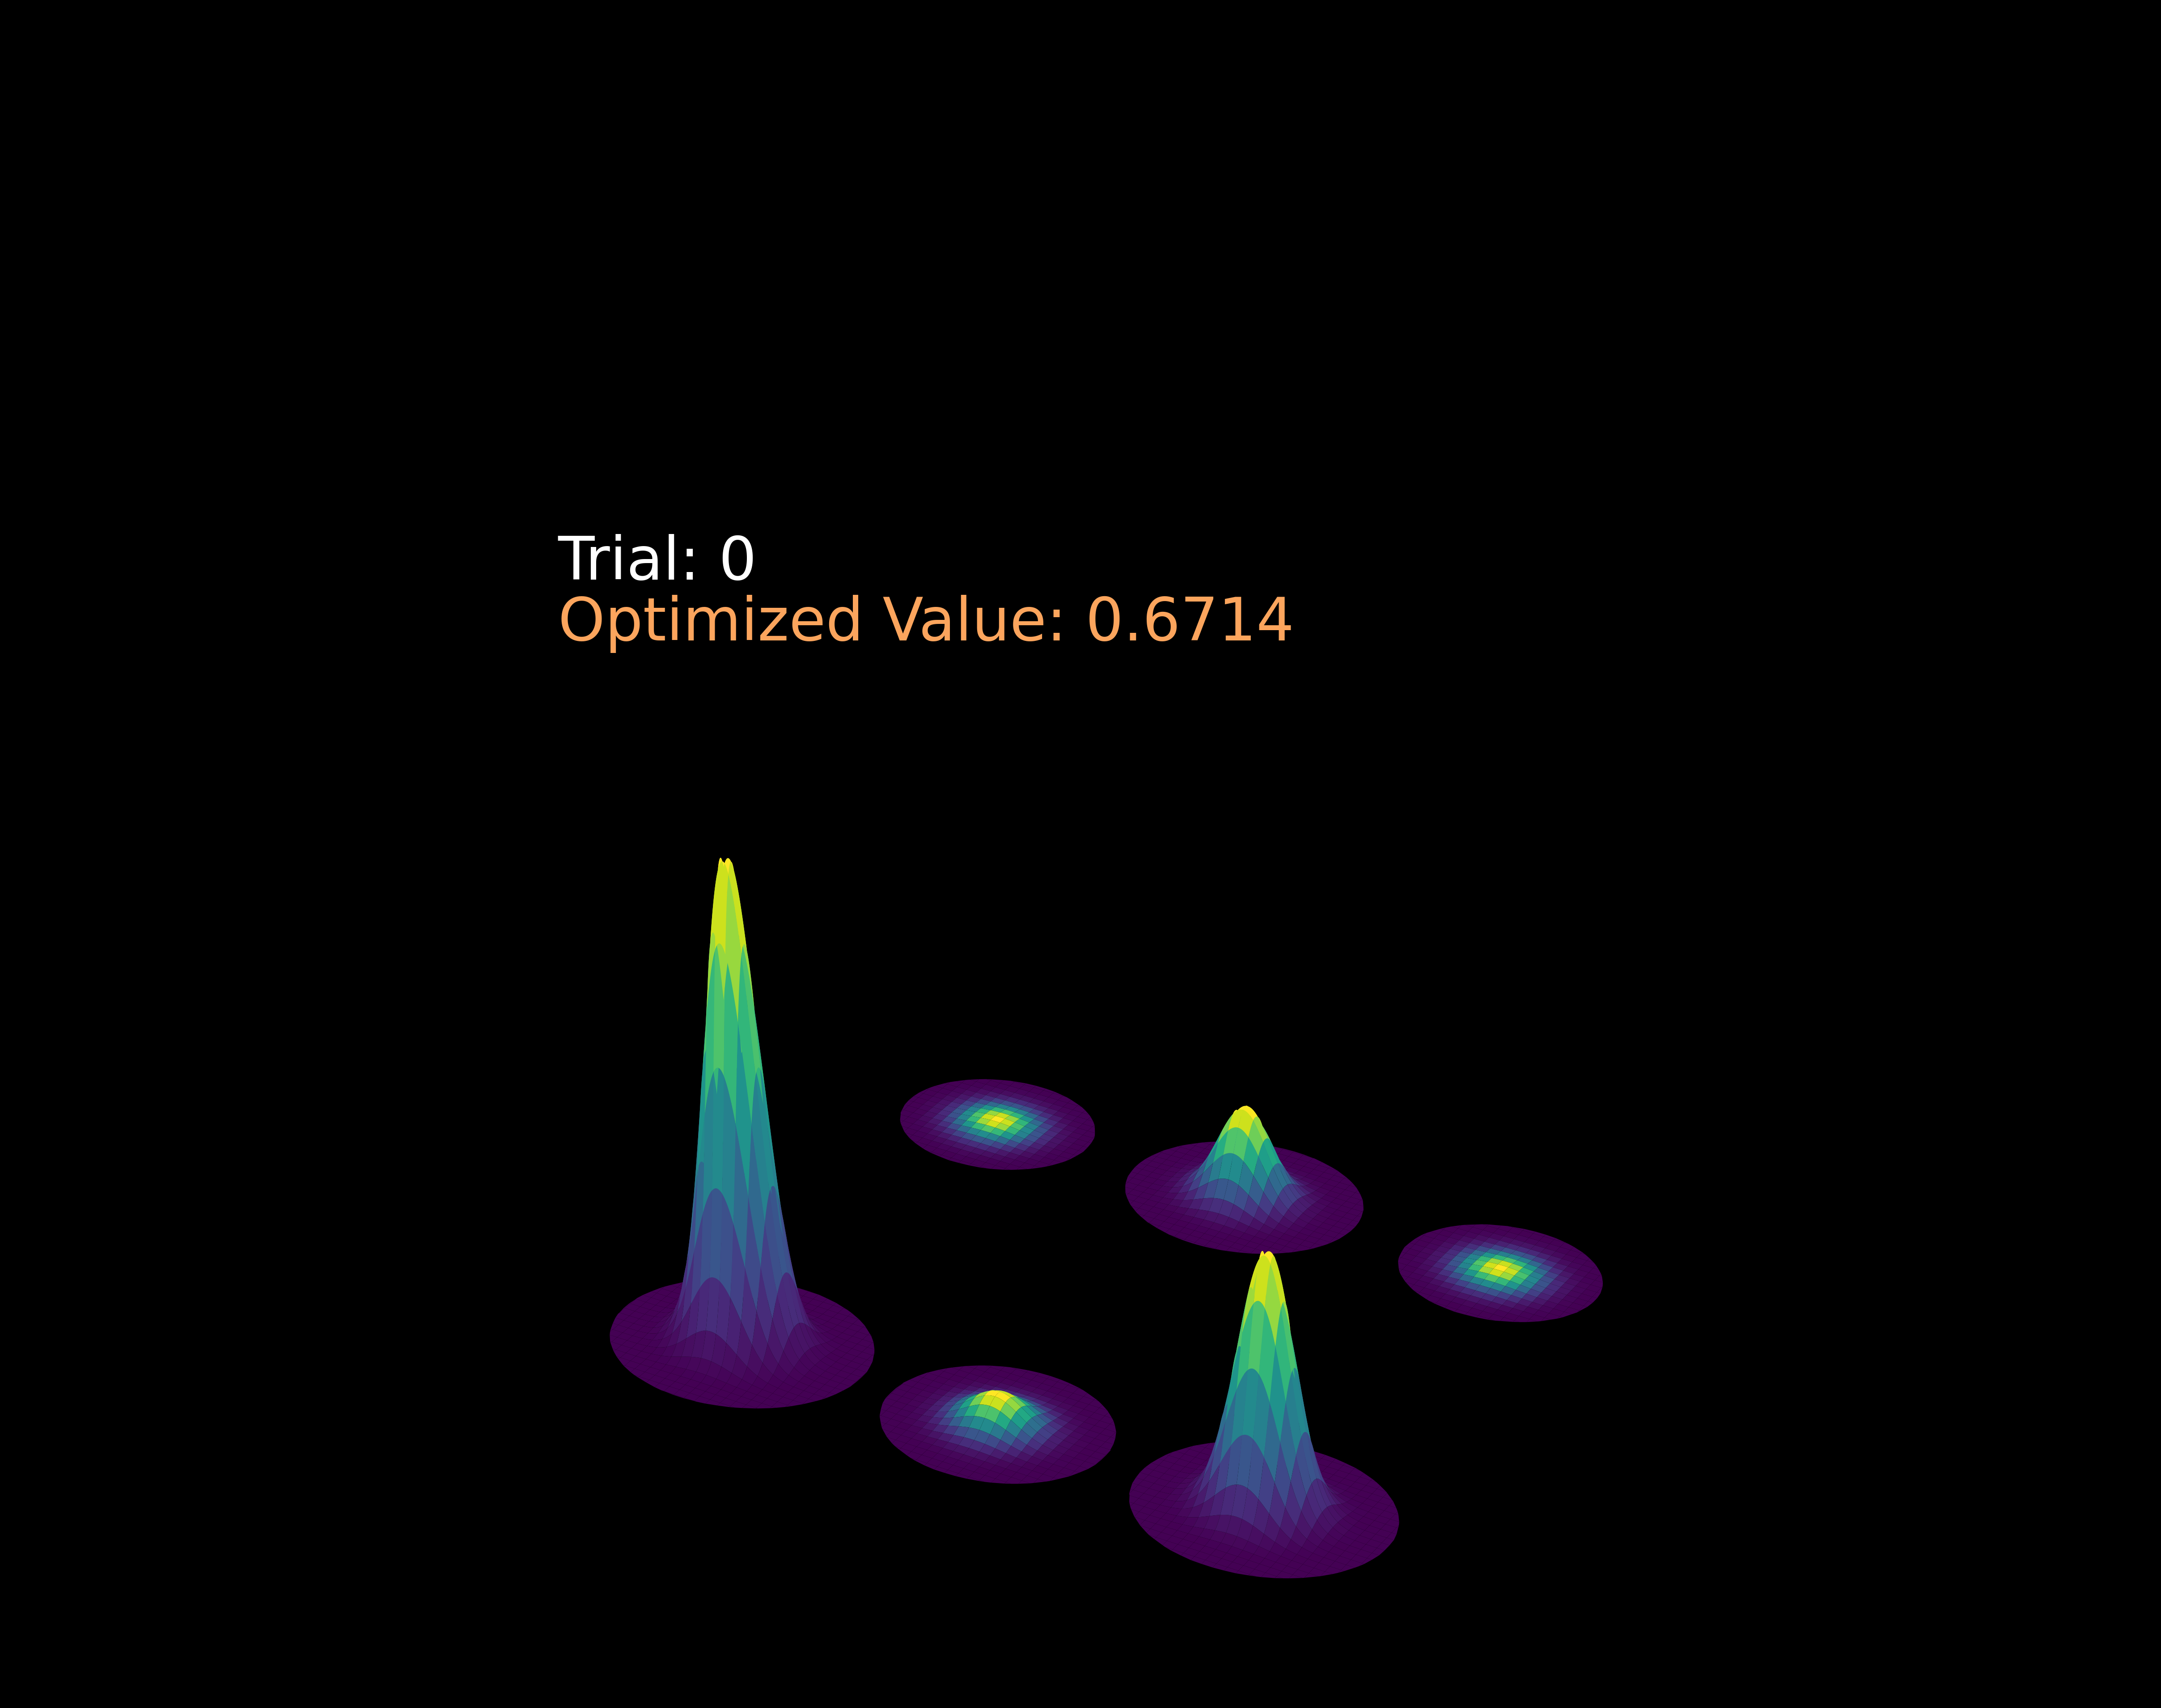

In [13]:

#face_color = viridis(0)
face_color = 'black'
fig = plt.figure(figsize=(20, 16), dpi=300, facecolor=face_color) # have to have a background for ffmpeg
gs = gridspec.GridSpec(4, 1)

# ax = fig.add_subplot(2, 1, 2, projection='3d', frame_on=False)
ax = plt.subplot(gs[1:4], projection='3d', frame_on=False)

ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False  # Make panes transparent
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.xaxis.pane.set_linewidth(0)
ax.yaxis.pane.set_linewidth(0)
ax.zaxis.pane.set_linewidth(0)
ax.xaxis.line.set_lw(0.)  # Hide the x axis
ax.yaxis.line.set_lw(0.)  # Hide the y axis
ax.zaxis.line.set_lw(0.)  # Hide the z axis

# Hide axes ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Create a secondary subplot for the time series plot
ax2 = plt.subplot(gs[0:1])
#ax2 = fig.add_subplot(2, 1, 1)
ax2.set_xlabel('Trial Number')
ax2.set_ylabel('Optimized Value')
ax2.set_title('Optimization Progress')


ls = 1000
# Define the grid for plotting the distributions
dist_size = 4
x = np.linspace(-dist_size, dist_size, ls)
y = np.linspace(-dist_size, dist_size, ls)
X, Y = np.meshgrid(x, y)

# Define the grid for plotting the base surface
x_base = np.linspace(-5, 5, ls)
y_base = np.linspace(-5, 5, ls)
X_base, Y_base = np.meshgrid(x_base, y_base)

# Define the variances for the distributions (you can adjust these values)
sing_var = 0.15
variances = [sing_var, sing_var, sing_var, sing_var, sing_var, sing_var]

# Define unique coordinates for each hyperparameter
coord_dist = 2
coordinates = [
    [-coord_dist, -coord_dist], [-coord_dist, coord_dist], 
    [coord_dist, -coord_dist], [coord_dist, coord_dist], 
    [0, -coord_dist], [0, coord_dist]
]
# Get the minimum and maximum values for each hyperparameter across all trials
min_values = interpolated_trials[['params_n_estimators', 'params_max_depth', 'params_learning_rate', 'params_min_child_weight', 'params_subsample', 'params_colsample_bytree']].min()
max_values = interpolated_trials[['params_n_estimators', 'params_max_depth', 'params_learning_rate', 'params_min_child_weight', 'params_subsample', 'params_colsample_bytree']].max()
# Get the minimum and maximum trial numbers
min_trial_num = interpolated_trials['number'].min()
max_trial_num = interpolated_trials['number'].max()
# Get the minimum and maximum values of the 'value' column
min_value = interpolated_trials['value'].min()
max_value = interpolated_trials['value'].max()
margin = 0.05  # 5% margin
value_range = max_value - min_value

def update(num, trials, variances, coordinates, ax):
    #print(num)
    ax.cla()
    ax.set_facecolor(face_color)

    ax.grid(False)
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False  # Make panes transparent
    ax.xaxis.line.set_lw(0.)  # Hide the x axis
    ax.yaxis.line.set_lw(0.)  # Hide the y axis
    ax.zaxis.line.set_lw(0.)  # Hide the z axis
    
    # Hide axes ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    #ax.plot_surface(X_base, Y_base, np.zeros_like(X_base) - 0.01, color=plt.cm.viridis(0), alpha=0.1, linewidth=0, antialiased=False)
    trial_num = num / interp_steps

    # Clear the subplot to avoid overlaying of data
    ax2.clear()  
    ax2.set_facecolor(face_color)
    # Set the x-limits to keep the x-axis fixed
    ax2.set_xlim(0, len(interpolated_trials) - 1)
    ax2.set_ylim(min_value - margin * value_range, max_value + margin * value_range)
    ax2.set_title('Optimization Progress')

    cmap = plt.cm.RdYlGn
    # Get the normalized values for the color mapping
    normalized_values = (interpolated_trials['value'][:num+1] - min_value) / (max_value - min_value)
    # Get the colors corresponding to the normalized values
    colors = cmap(normalized_values)
    # Plot individual line segments with different colors
    for i in range(num):
        ax2.plot([i, i+1], interpolated_trials['value'][i:i+2], color=colors[i], linewidth=4)

    # Get the normalized value for the current trial
    current_normalized_value = (interpolated_trials.iloc[num]['value'] - min_value) / (max_value - min_value)
    # Get the color corresponding to the normalized value
    current_color = cmap(current_normalized_value)

    ax.text2D(0.05, 0.95, f"Trial: {num // interp_steps}", transform=ax.transAxes, fontsize=32, va='top', ha='left', color='white')
    ax.text2D(0.05, 0.90, f"Optimized Value: {interpolated_trials.iloc[num]['value']:.4f}", transform=ax.transAxes, fontsize=32, va='top', ha='left', color=current_color)

    # Get the hyperparameter values for the current trial
    params = interpolated_trials.iloc[num][['params_n_estimators', 'params_max_depth', 
                                            'params_learning_rate', 'params_min_child_weight', 'params_subsample', 'params_colsample_bytree']].values
    
    # Normalize the hyperparameter values to be between 0 and 1 using the min and max values from all trials
    params_normalized = (params - min_values.values) / (max_values.values - min_values.values)+.01 # add constant so we see SOMETHING

    #print(params_normalized)
    # Plot a 3D Gaussian distribution for each hyperparameter
    for i, (param, variance, coord) in enumerate(zip(params_normalized, variances, coordinates)):
        pos = np.dstack((X, Y))
        #print(pos)
        rv = multivariate_normal(coord, [[variance, 0], [0, variance]])
        Z = rv.pdf(pos) * param
        Z[Z < 0.00001] = np.nan  # Set a threshold to remove low Z values
        ax.plot_surface(X + coord[0], Y + coord[1], Z, cmap='viridis', linewidth=0, alpha=1)
    
    # Plot the base surface again with a high transparency value
    #ax.plot_surface(X_base, Y_base, np.zeros_like(X_base) - 0.1, color=plt.cm.viridis(0), alpha=0.2, linewidth=0, antialiased=False)
    
    ax.set_xlim(-5, 5)  # Set the limits to provide more space around the edges
    ax.set_ylim(-6, 6)  # Set the limits to provide more space around the edges
   
# Create an animation
ani = FuncAnimation(fig, update, frames=len(interpolated_trials), fargs=(interpolated_trials, variances, coordinates, ax), interval=10)

# Save the animation
#ani.save('hyperparameter_optimization_FULL.gif', writer='pillow', dpi=300)  # Adjust dpi as needed

# Specify the writer
writer = writers['ffmpeg'](fps=12, metadata=dict(artist='Me'), bitrate=3000)

# Save the animation
ani.save('hyperparameter_optimization.mp4', writer=writer, dpi=300)  # Adjust dpi as needed

# Display the animation
#plt.show()


In [ ]:
interpolated_trials.head()

,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_subsample,value,number,datetime_start,datetime_complete,duration,state
0,0.585627,0.150537,1.000000,1.000000,943.000000,0.526110,0.671446,0,2023-09-15 19:02:06.533305,2023-09-15 19:02:13.475305,0 days 00:00:06.942000,COMPLETE
1,0.587321,0.150953,1.521739,1.130435,943.826087,0.537182,0.672842,0,2023-09-15 19:02:06.533305,2023-09-15 19:02:13.475305,0 days 00:00:06.942000,COMPLETE
2,0.589015,0.151369,2.043478,1.260870,944.652174,0.548253,0.674237,0,2023-09-15 19:02:06.533305,2023-09-15 19:02:13.475305,0 days 00:00:06.942000,COMPLETE
3,0.590709,0.151785,2.565217,1.391304,945.478261,0.559324,0.675633,0,2023-09-15 19:02:06.533305,2023-09-15 19:02:13.475305,0 days 00:00:06.942000,COMPLETE
4,0.592403,0.152202,3.086957,1.521739,946.304348,0.570395,0.677028,0,2023-09-15 19:02:06.533305,2023-09-15 19:02:13.475305,0 days 00:00:06.942000,COMPLETE
